In [5]:
import requests
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt

In [6]:
def base64_to_pil_image(image_base64: str) -> Image:
    return Image.open(io.BytesIO(base64.decodebytes(bytes(image_base64, "utf-8")))).convert('RGB')

## 1. Определение по входящему изображению распределения вероятностей на top-5 категорий достопримечательностей, top-5 названий наиболее похожих достопримечательностей с их координатами

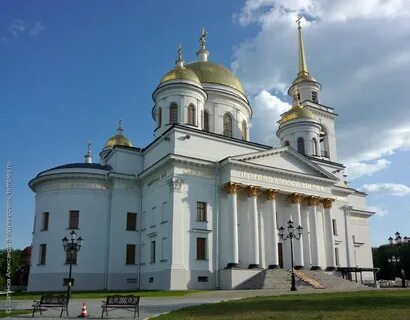

In [7]:
# тестовое изображение

Image.open('test.png').convert('RGB')

In [8]:
response = requests.post(url='http://127.0.0.1:8000/search/by_image',
                        params={
                            "city": 'Нижний Новгород',
                        },
                        files={
                            "image_file": open('test.png', 'rb')
                            }).json()

In [9]:
response

{'cats_probs': [{'category': 'religion', 'probability': 0.9993059635162354},
  {'category': 'planetariums', 'probability': 0.0003048586950171739},
  {'category': 'fortifications', 'probability': 0.00014074286445975304},
  {'category': 'puppetries', 'probability': 0.00013024682994000614},
  {'category': 'gardens_and_parks', 'probability': 0.00011825170804513618}],
 'names_coords': [{'sight_name': 'Спасо-преображенская церковь',
   'lon': 43.933346,
   'lat': 56.256714},
  {'sight_name': 'Храм Сергия Радонежского',
   'lon': 43.987236,
   'lat': 56.323441},
  {'sight_name': 'Храм святителей Московских',
   'lon': 43.997238,
   'lat': 56.312874},
  {'sight_name': 'Церковь во имя Святого Пророка Божия Илии',
   'lon': 43.993713,
   'lat': 56.328205},
  {'sight_name': 'Благовещенский собор', 'lon': 43.976471, 'lat': 56.322552}]}

### Диаграмма распределения вероятностей для пяти наиболее близких категорий

In [11]:
cats_probs_list, names_coords_list = response['cats_probs'], response['names_coords']
cats = [cat_prob_dict['category'] for cat_prob_dict in cats_probs_list]
cats_probs = [cat_prob_dict['probability'] for cat_prob_dict in cats_probs_list]

cats, cats_probs

(['religion',
  'planetariums',
  'fortifications',
  'puppetries',
  'gardens_and_parks'],
 [0.9993059635162354,
  0.0003048586950171739,
  0.00014074286445975304,
  0.00013024682994000614,
  0.00011825170804513618])

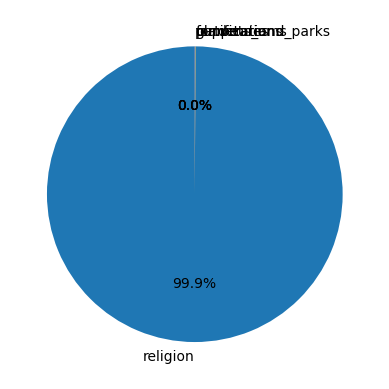

In [12]:
plt.pie(x=cats_probs, labels=cats, autopct='%1.1f%%', textprops={'fontsize': 10}, startangle=90,)
plt.show()

### Пять наиболее похожих достопримечательностей (название + координаты) для входного изображения

In [15]:
names_coords_list

[{'sight_name': 'Спасо-преображенская церковь',
  'lon': 43.933346,
  'lat': 56.256714},
 {'sight_name': 'Храм Сергия Радонежского',
  'lon': 43.987236,
  'lat': 56.323441},
 {'sight_name': 'Храм святителей Московских',
  'lon': 43.997238,
  'lat': 56.312874},
 {'sight_name': 'Церковь во имя Святого Пророка Божия Илии',
  'lon': 43.993713,
  'lat': 56.328205},
 {'sight_name': 'Благовещенский собор', 'lon': 43.976471, 'lat': 56.322552}]

## 2. Поиск пяти наиболее похожих достопримечательностей (название, координаты, изображение) для входящего текстового запроса

In [21]:
response = requests.post(url='http://127.0.0.1:8000/search/by_text',
                        params={
                            "text": 'Парк для прогулки и отдыха',
                            "city": 'Нижний Новгород'
                        }).json()['result']

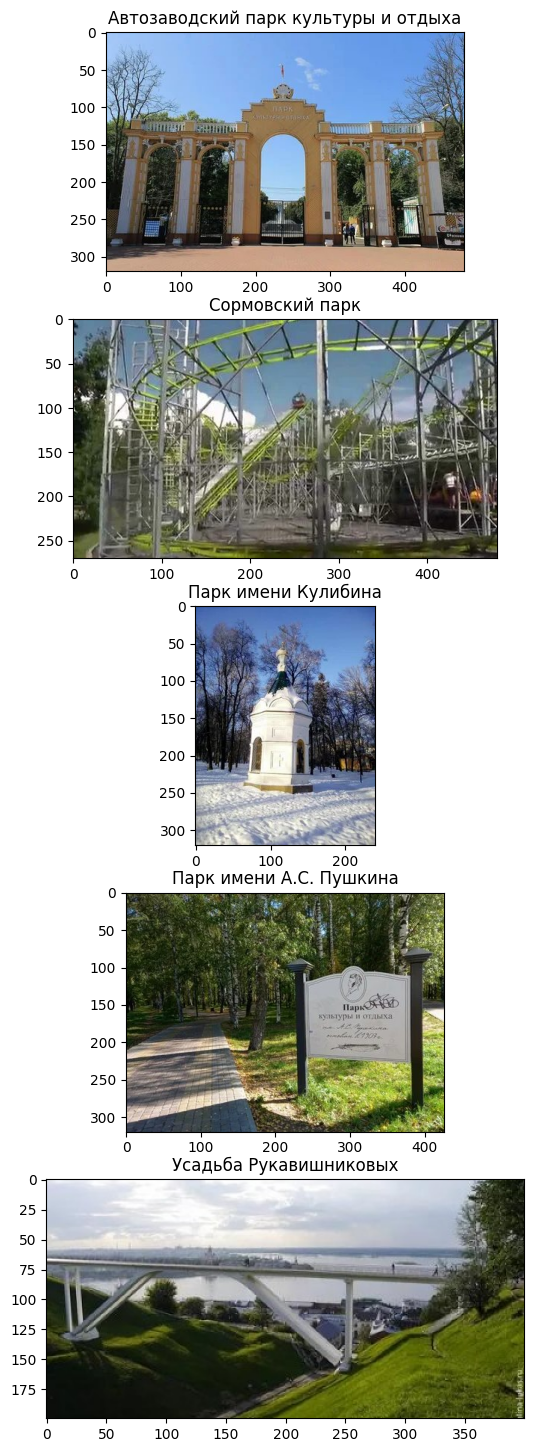

In [23]:
names = [search_dict['sight_name'] for search_dict in response]
images = [search_dict['encoded_img'] for search_dict in response]

plt.figure(figsize=(10, 18))

for i in range(len(names)):
    plt.subplot(5, 1, i+1)
    plt.title(names[i])
    plt.imshow(base64_to_pil_image(images[i]))